In [ ]:
pip install lightkurve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 118.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 KB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.6 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=c895f9ecf0eb20708d40bf882c90493ffad5e478aeb16c51602d8b

In [ ]:
from lightkurve import search_targetpixelfile
from lightkurve import TessTargetPixelFile
import lightkurve as lk
import numpy as np

<AxesSubplot:title={'center':'Target ID: 6922244, Cadence: 12924'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

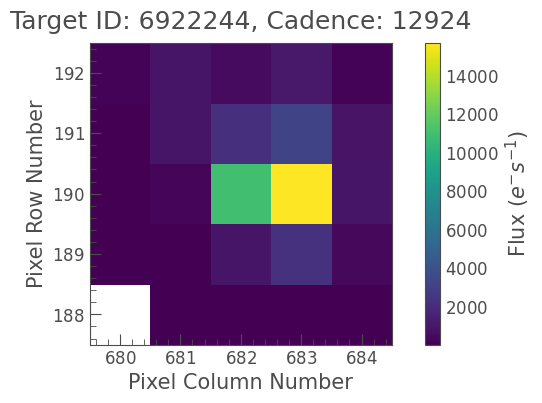

In [ ]:
# Boyajin/ tabby's star/WTF (KIC 8462852)
# Download the pixelfile for a given star
# A quarter means a quarter of a year
pixelFile = search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=4).download()
# Show a single snapshot
pixelFile.plot(frame=1000)

In [ ]:


lc = pixelFile.to_lightcurve(aperture_mask=pixelFile.pipeline_mask)


In [ ]:
lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
352.37632485035283,43689.1484375,6.631562232971191,682.6803253766153,190.0726135828141,11914,0
352.3967580484896,43698.078125,6.631830215454102,682.679939392134,190.0724388237138,11915,8192
352.4376244455707,43694.10546875,6.6317877769470215,682.6796255144184,190.07267575992847,11917,16
352.45805764463876,43698.31640625,6.631948947906494,682.6797879974883,190.07249571597706,11918,0
352.4784908439324,43687.6484375,6.631504535675049,682.6792868410989,190.07246464783114,11919,0
352.4989240434661,43686.4765625,6.6314263343811035,682.6797248240034,190.07284002730125,11920,0
352.5193572433491,43692.59375,6.631662845611572,682.6797061866289,190.07275265635383,11921,0
352.53979034345684,43712.01953125,6.6356940269470215,682.6787299772047,190.07316832254241,11922,128


In [ ]:
lc.time, lc.flux

(<Time object: scale='tdb' format='bkjd' value=[352.37632485 352.39675805 352.43762445 ... 442.16263546 442.18306983
  442.2035041 ]>,
 <Quantity [43689.15 , 43698.08 , 43694.105, ..., 43155.8  , 43148.465,
            43151.562] electron / s>)

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

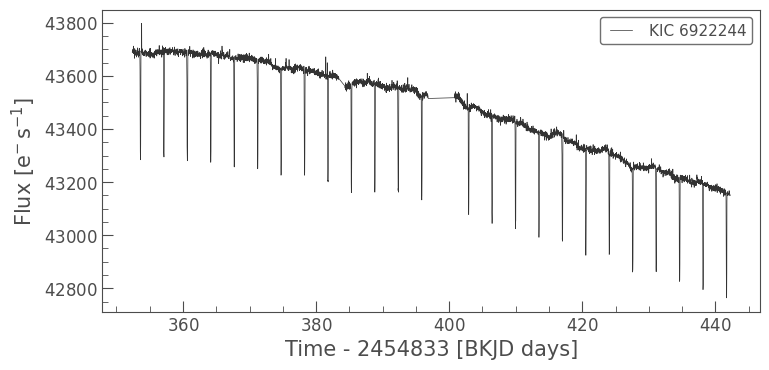

In [ ]:
lc.plot()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

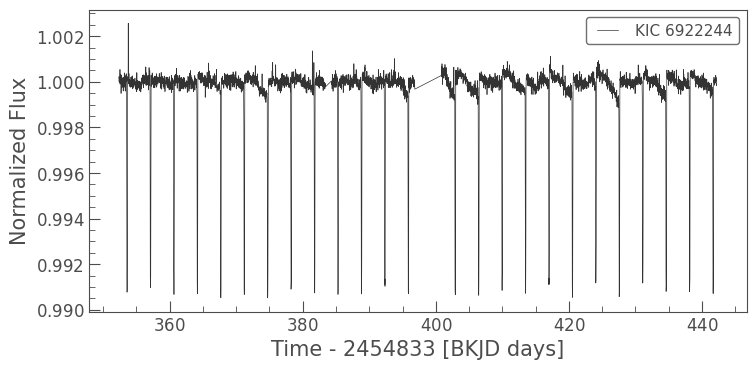

In [ ]:
flat_lc = lc.flatten(window_length = 401)
flat_lc.plot()

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

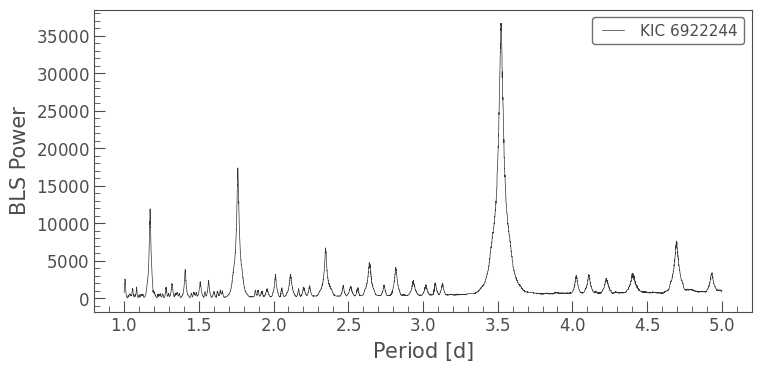

In [ ]:
period = np.linspace(1, 5, 10000)
# BLS = Box Least Squares
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()

In [ ]:
best_fit_period = bls.period_at_max_power
print('Best fit period: {:3f}'.format(best_fit_period))

Best fit period: 3.522652 d


<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

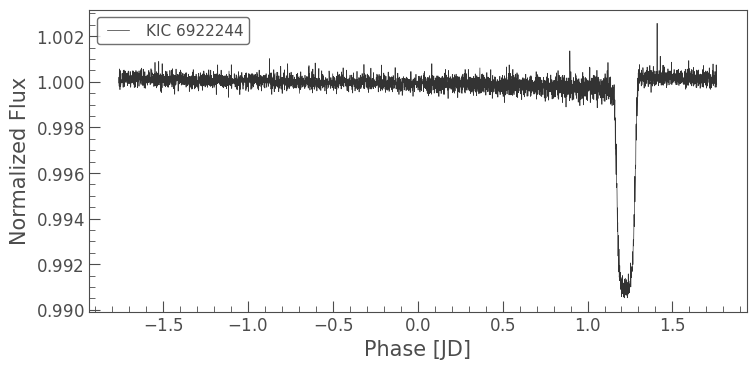

In [ ]:
folded_lc = flat_lc.fold(period=3.522652)
folded_lc.plot()

In [ ]:
search_result = lk.search_lightcurve('Kepler-8', author="Kepler", cadence="long")
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr006922244,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr006922244,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr006922244,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr006922244,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr006922244,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr006922244,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr006922244,0.0
7,Kepler Quarter 07,2010,Kepler,1800,kplr006922244,0.0
8,Kepler Quarter 08,2011,Kepler,1800,kplr006922244,0.0


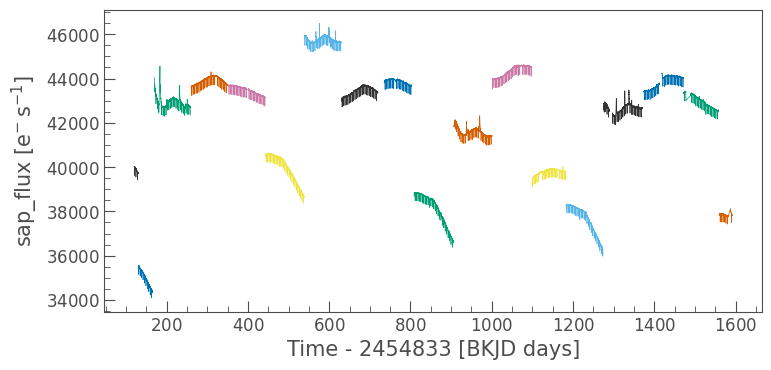

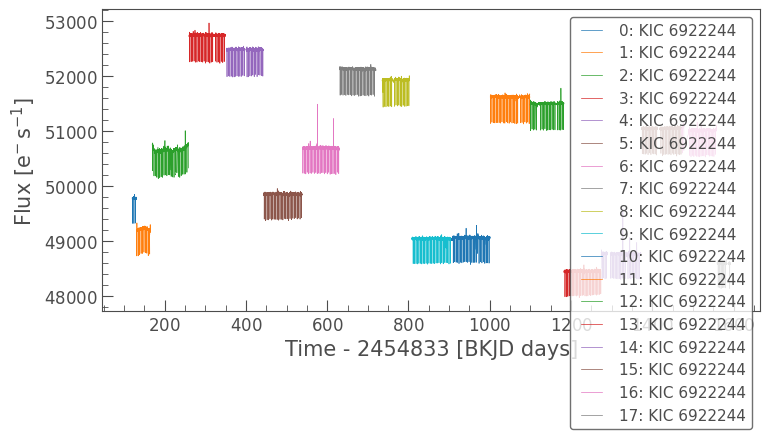

In [ ]:
lc_collection = search_result.download_all()
ax = lc_collection[0].plot(column='sap_flux', label=None)
for lc in lc_collection[1:]:
    lc.plot(ax=ax, column='sap_flux', label=None)

lc_collection.plot();

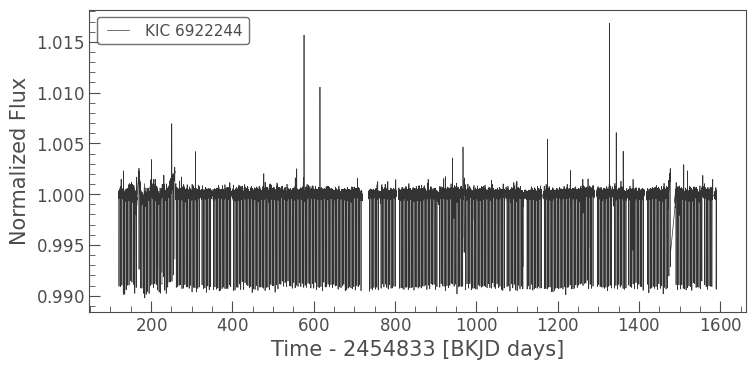

In [ ]:
lc_stitched = lc_collection.stitch()
lc_stitched.plot();

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

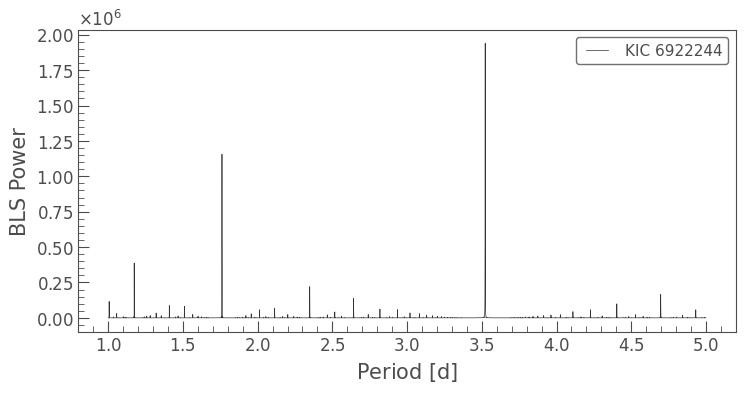

In [ ]:
period = np.linspace(1, 5, 10000)
# BLS = Box Least Squares
blss = lc_stitched.to_periodogram(method='bls', period=period, frequency_factor=500)
blss.plot()

In [ ]:
best_fit_period = blss.period_at_max_power
print('Best fit period: {:3f}'.format(best_fit_period))

Best fit period: 3.522652 d


<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

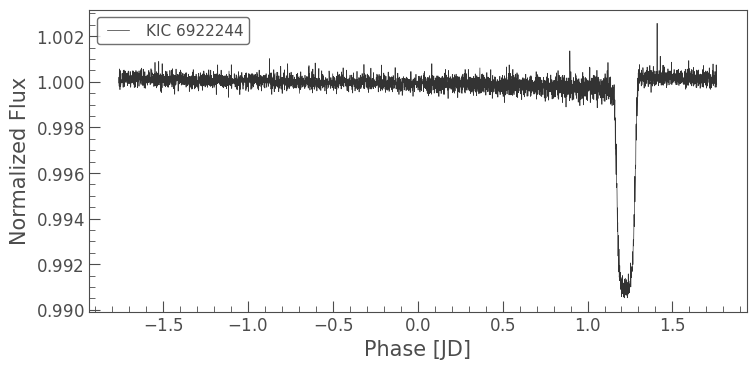

In [ ]:
folded_lc = flat_lc.fold(period=3.522652)
folded_lc.plot()

<ipython-input-158-af7e1274976d>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=10)


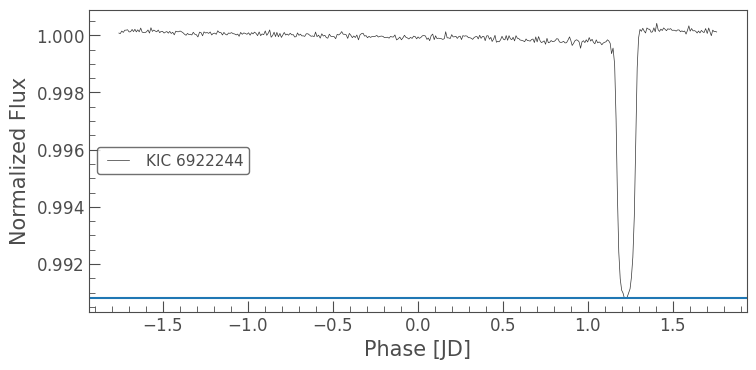

In [ ]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.plot()
plt.axhline(0.9908)

In [ ]:
# Mass Of the exoplanet
from astropy import units as u
transit_depth = 1-0.9908
R_star = 1.1*u.Rsun

r_pl_solar_radius = np.sqrt(transit_depth)*R_star
r_pl_solar_radius+

<Quantity 0.10550829 solRad>

In [ ]:
r_pl_earth_radius = r_pl_solar_radius.to(u.Rearth)
r_pl_earth_radius

<Quantity 11.50846174 earthRad>